Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Data Collection and Exploratory Data Analysis

In [2]:
df1=pd.read_csv(r"D:\datasets\used car price prediction\car_data.csv")

In [3]:
df1.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.4
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.8
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.3


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2237 non-null   object 
 1   Selling Price      2237 non-null   int64  
 2   Kilometers Driven  2237 non-null   int64  
 3   Year               2237 non-null   int64  
 4   Owner              2237 non-null   object 
 5   Fuel Type          2237 non-null   object 
 6   Transmission       2237 non-null   object 
 7   Insurance          2223 non-null   object 
 8   Car Condition      2237 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 157.4+ KB


In [5]:
df1['Model'].nunique()

434

In [6]:
df2=pd.read_csv(r"D:\datasets\used car price prediction\model_data.csv")

In [7]:
df2.head()

,Model,Current Price
0,HyundaiElitei20Sportz(O)1.4CRDi,Rs.7.69 Lakh
1,MarutiErtigaZXISMARTHYBRID,Rs.9.27 Lakh
2,MarutiVitaraBrezzaLDI,"Rs.7,62,742"
3,FordEcosport1.5TITANIUMTIVCT,Rs.7.64 Lakh
4,HyundaiVernaFLUIDIC1.4CRDI,"Rs.9,99,900"


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          434 non-null    object
 1   Current Price  433 non-null    object
dtypes: object(2)
memory usage: 6.9+ KB


In [9]:
df=pd.merge(df1,df2, on='Model', how='outer')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2237 non-null   object 
 1   Selling Price      2237 non-null   int64  
 2   Kilometers Driven  2237 non-null   int64  
 3   Year               2237 non-null   int64  
 4   Owner              2237 non-null   object 
 5   Fuel Type          2237 non-null   object 
 6   Transmission       2237 non-null   object 
 7   Insurance          2223 non-null   object 
 8   Car Condition      2237 non-null   float64
 9   Current Price      2235 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 192.2+ KB


Data Cleaning and Feature Engineering

In [11]:
df[['Current Price']]

,Current Price
0,Rs.4.65 Lakh
1,Rs.4.65 Lakh
2,Rs.4.65 Lakh
3,Rs.4.65 Lakh
4,Rs.4.65 Lakh
...,...
2232,Rs.4.78 Lakh
2233,Rs.11.97 Lakh
2234,Rs.8.64 Lakh
2235,"7,22,198"


In [12]:
# Changing the values of the column Current Price
replace_dict = {'Rs.': '', 'Lakh': ''}
replace_dict2 = {',':''}
df['Current Price'] = df['Current Price'].replace(replace_dict, regex=True)
df['Current Price'] = df['Current Price'].replace(replace_dict2, regex=True)
df['Current Price'] = df['Current Price'].astype(float).multiply(100000)

In [13]:
df.isnull().sum()

Model                 0
Selling Price         0
Kilometers Driven     0
Year                  0
Owner                 0
Fuel Type             0
Transmission          0
Insurance            14
Car Condition         0
Current Price         2
dtype: int64

In [14]:
# Checking the '0' Values in the Column
df[df['Current Price']<1]

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price
1371,VolkswagenPoloCOMFORTLINE1.2L,272299,45711,2010,First Owner,Petrol,MANUAL,15-01-2022,4.5,0.0
1372,VolkswagenPoloCOMFORTLINE1.2L,256399,63748,2013,First Owner,Petrol,MANUAL,28-06-2021,4.0,0.0
1373,VolkswagenPoloCOMFORTLINE1.2L,604106,27276,2017,First Owner,Petrol,MANUAL,11-10-2020,4.6,0.0
1374,VolkswagenPoloCOMFORTLINE1.2L,317999,69745,2013,First Owner,Petrol,MANUAL,29-07-2021,4.4,0.0
1375,VolkswagenPoloCOMFORTLINE1.2L,443699,60295,2016,Second Owner,Petrol,MANUAL,24-11-2021,4.3,0.0
1376,VolkswagenPoloCOMFORTLINE1.2L,380699,101779,2016,First Owner,Petrol,MANUAL,05-12-2020,4.3,0.0
1377,VolkswagenPoloCOMFORTLINE1.2L,365299,56244,2013,Third Owner,Diesel,MANUAL,Expired,3.9,0.0
1378,VolkswagenPoloCOMFORTLINE1.2L,355530,66519,2016,Second Owner,Petrol,MANUAL,Expired,4.3,0.0
1379,VolkswagenPoloCOMFORTLINE1.2L,302899,40836,2012,First Owner,Petrol,MANUAL,Expired,3.9,0.0
1380,VolkswagenPoloCOMFORTLINE1.2L,581899,15426,2017,First Owner,Petrol,MANUAL,11-04-2021,4.7,0.0


In [15]:
df['Current Price'] = df['Current Price'].fillna(df['Current Price'].mode().iloc[0])

In [16]:
df.loc[df['Current Price'] < 1, 'Current Price'] =df[df['Current Price'] < 1]['Current Price'].replace(0, df['Current Price'].median())

In [17]:
df['Year'].value_counts()

2012    314
2013    275
2014    252
2015    252
2017    212
2016    196
2011    179
2018    164
2010    137
2009     88
2019     82
2008     53
2007     23
2020      8
2006      2
Name: Year, dtype: int64

In [18]:
from datetime import date
year = date.today().year
df['Age'] = year - df['Year']

In [19]:
df['Transmission'].unique()

array(['MANUAL', 'MH12', 'TS07', 'KA01', 'MH05', 'DL5C', 'DL9C', 'MH04',
       'TS08', 'AUTOMATIC', 'UP14', 'UP32', 'HR03', 'MH01', 'DL2C',
       'KA05', 'KA50', 'KA53', 'DL12', 'DL11', 'GJ27', 'TN12', 'TN02',
       'HR26', 'MH03', 'MH47', 'TS09', 'RJ14', 'TN06', 'MH43', 'DL4C',
       'KA02', 'MH02', 'RJ45', 'DL3C', 'TN22', 'KA04', 'MH46', 'KA51',
       'PB91', 'DL8C', 'GJ18', 'HR51', 'DL10', 'HR29', 'KA03', 'DL14',
       'GJ05', 'GJ01', 'PB10', 'MH14', 'UP78', 'GJ06', 'Ch01', 'HR05',
       'HR12', 'DL1C', 'PB11'], dtype=object)

In [20]:
df['Transmission'].value_counts()

MANUAL       1909
AUTOMATIC     170
MH02            9
HR26            9
DL4C            8
MH12            8
KA05            7
MH04            6
DL12            6
MH03            6
KA01            5
MH01            5
HR51            4
KA51            4
DL3C            4
KA03            4
MH47            4
MH43            4
DL5C            4
KA50            4
RJ14            3
TS07            3
DL8C            3
KA04            3
KA53            3
GJ27            3
MH14            2
DL2C            2
MH05            2
UP32            2
UP14            2
KA02            2
TS08            2
HR03            1
GJ05            1
GJ01            1
PB10            1
HR05            1
UP78            1
GJ06            1
Ch01            1
HR12            1
DL1C            1
DL14            1
GJ18            1
HR29            1
DL10            1
TS09            1
TN12            1
PB91            1
DL11            1
MH46            1
TN02            1
TN22            1
DL9C            1
RJ45      

In [21]:
# Cleaning the Transmission Column
df['Transmission'] = np.where(df['Transmission'] != 'AUTOMATIC', 'MANUAL', df['Transmission'])

In [22]:
df['Insurance'].value_counts()

Expired              248
Comp                  64
Zero_Dep              61
Third_party           25
Insurance Expired     16
                    ... 
06-01-2023             1
12-09-2022             1
15-02-2022             1
11-01-2022             1
20-11-2020             1
Name: Insurance, Length: 473, dtype: int64

In [23]:
df['Insurance'].unique()

array(['Expired', '26-07-2021', '18-09-2021', '25-05-2021', '15-10-2021',
       '02-02-2021', '28-07-2021', '22-11-2022', '20-07-2021', 'Comp',
       '27-01-2021', '18-11-2021', '14-04-2021', '16-08-2021',
       '10-09-2020', '06-05-2021', '11-06-2021', '27-09-2021',
       '08-10-2020', '09-10-2021', '02-08-2021', '29-05-2021',
       '01-02-2021', '10-08-2021', '15-01-2021', '04-05-2021',
       '31-01-2022', '11-09-2021', '14-10-2021', '24-02-2021',
       '20-12-2021', '27-08-2021', '04-11-2021', '08-03-2021',
       '22-10-2021', '14-02-2021', '04-04-2021', '05-02-2021',
       '15-07-2021', '12-09-2021', '23-07-2021', '17-11-2021',
       '17-06-2021', '30-05-2021', '05-09-2020', '30-06-2021',
       '27-07-2021', '20-06-2021', '27-11-2021', '17-05-2021',
       '01-12-2020', '17-04-2021', '29-10-2021', '08-04-2021',
       '30-12-2020', '15-11-2021', '12-12-2021', '05-07-2021',
       '02-02-2020', '08-09-2021', '29-06-2021', '01-12-2021',
       '27-10-2021', '24-05-2020', '

In [24]:
# Changing the values of Insurance into Expired and not expired
df['Insurance'] = df['Insurance'].fillna('Not Expired')
df['Insurance'] = df['Insurance'].replace('Insurance Expired', 'Expired')
remaining_values = set(df['Insurance'].unique()) - {'Expired', 'Not Expired'}
df['Insurance'] = df['Insurance'].replace(remaining_values, 'Not Expired')

In [25]:
df = df.drop('Year', axis=1)

In [26]:
df.head()

,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price,Age
0,MarutiWagonR1.0LXI,312165,82238,First Owner,Petrol + CNG,MANUAL,Expired,4.2,465000.0,10
1,MarutiWagonR1.0LXI,242499,88514,Second Owner,Petrol + CNG,MANUAL,Not Expired,4.4,465000.0,9
2,MarutiWagonR1.0LXI,381699,29735,Second Owner,Petrol + CNG,MANUAL,Not Expired,4.3,465000.0,7
3,MarutiWagonR1.0LXI,181999,153709,First Owner,Petrol + CNG,MANUAL,Not Expired,4.1,465000.0,11
4,MarutiWagonR1.0LXI,239499,88691,Second Owner,Petrol + CNG,MANUAL,Not Expired,4.4,465000.0,12


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2237 non-null   object 
 1   Selling Price      2237 non-null   int64  
 2   Kilometers Driven  2237 non-null   int64  
 3   Owner              2237 non-null   object 
 4   Fuel Type          2237 non-null   object 
 5   Transmission       2237 non-null   object 
 6   Insurance          2237 non-null   object 
 7   Car Condition      2237 non-null   float64
 8   Current Price      2237 non-null   float64
 9   Age                2237 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 192.2+ KB


Data Visualization

Text(0, 0.5, 'Total Selling Price')

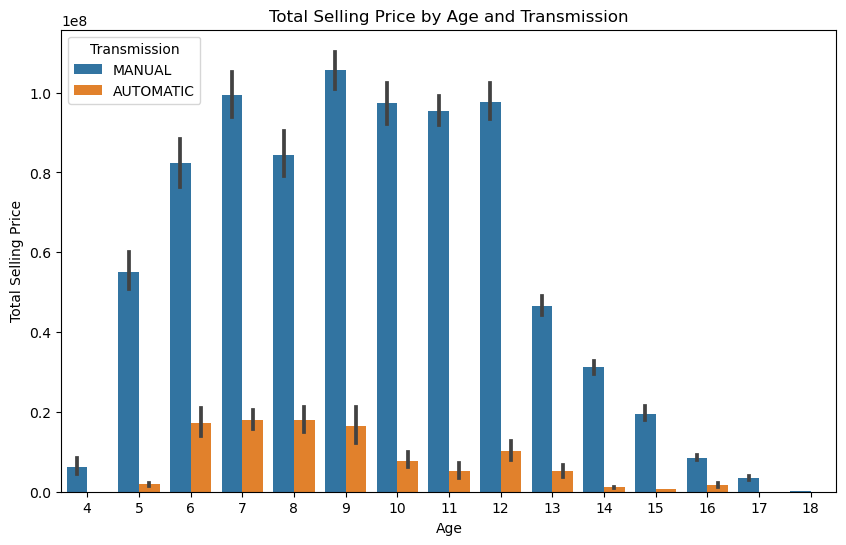

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Selling Price', data=df, estimator=sum, hue='Transmission')
plt.title('Total Selling Price by Age and Transmission')
plt.xlabel('Age')
plt.ylabel('Total Selling Price')

Text(0, 0.5, 'Frequency')

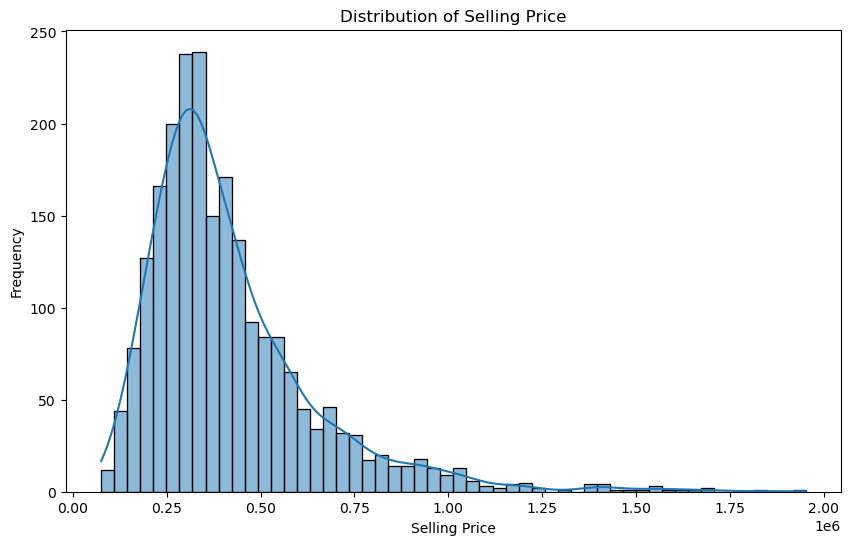

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Density')

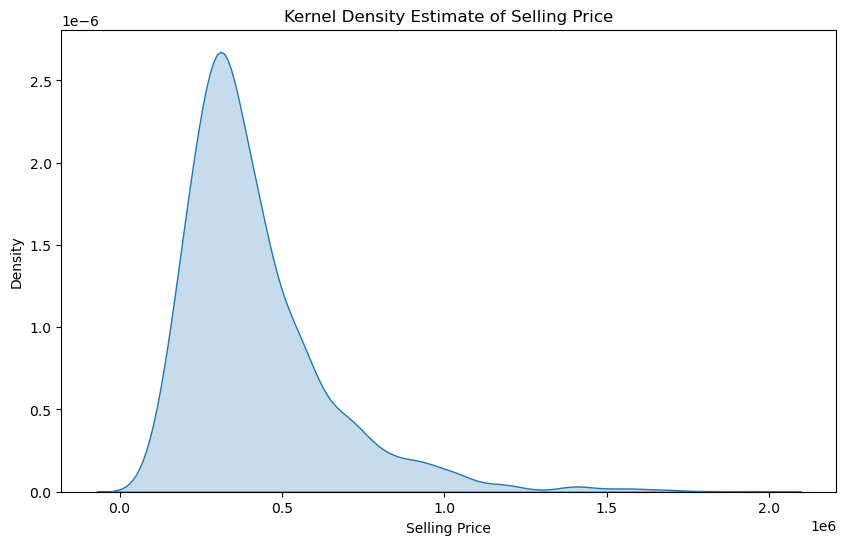

In [30]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Selling Price'], fill=True)
plt.title('Kernel Density Estimate of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Density')

Text(0, 0.5, 'Selling Price')

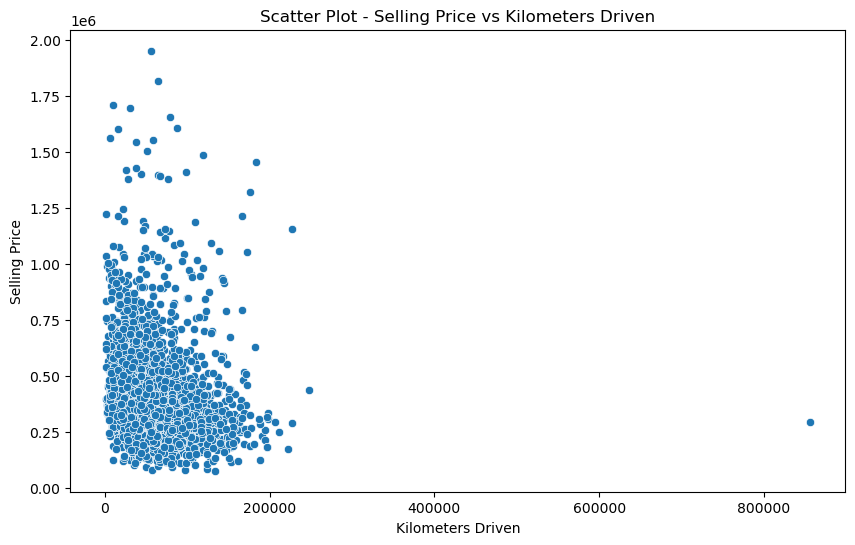

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometers Driven', y='Selling Price', data=df)
plt.title('Scatter Plot - Selling Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')

Text(0, 0.5, 'Count')

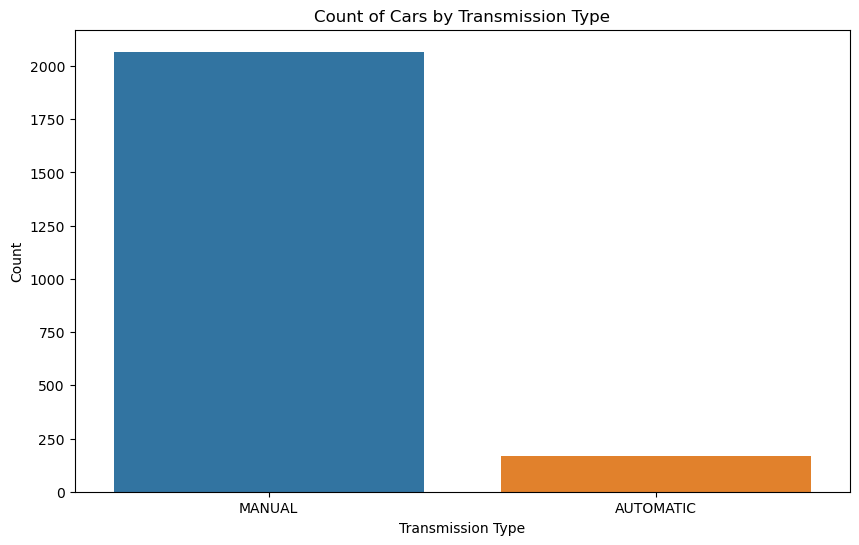

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Transmission', data=df)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')

Text(0, 0.5, 'Sum of Selling Price')

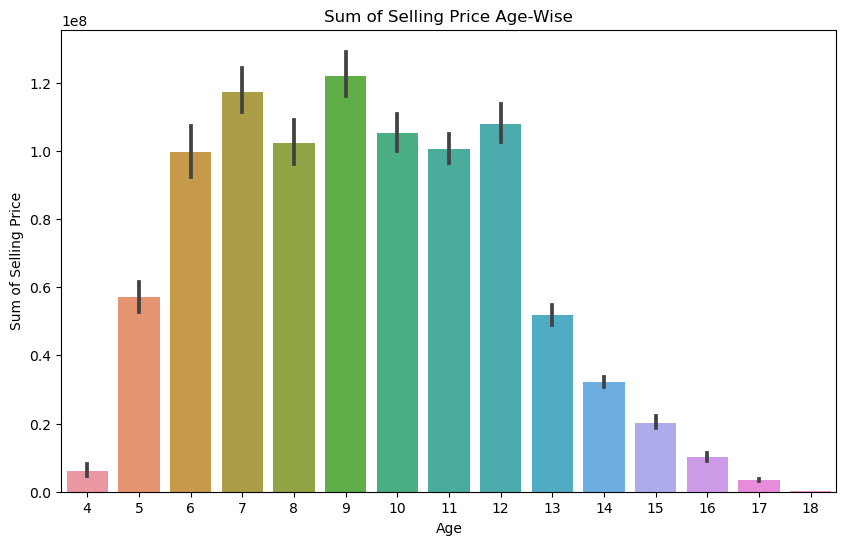

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Selling Price', data=df, estimator=sum)
plt.title('Sum of Selling Price Age-Wise')
plt.xlabel('Age')
plt.ylabel('Sum of Selling Price')

Text(0, 0.5, 'Selling Price')

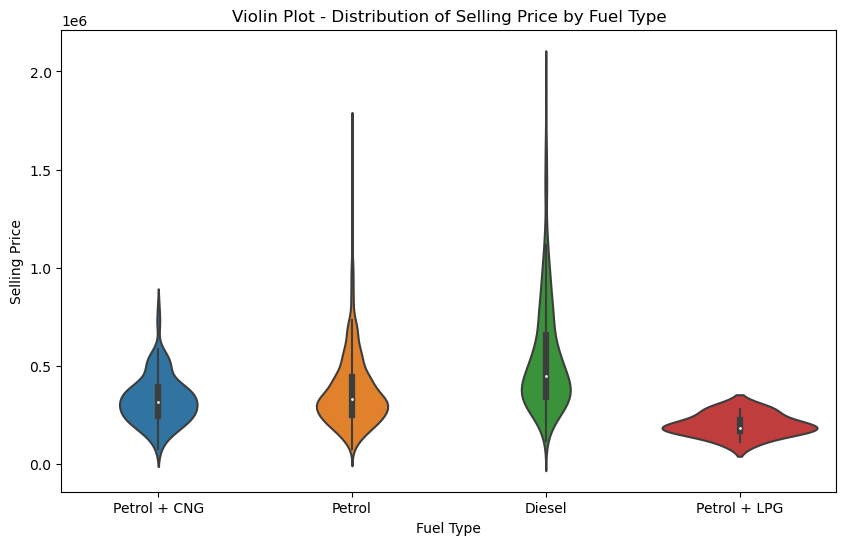

In [34]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Fuel Type', y='Selling Price', data=df)
plt.title('Violin Plot - Distribution of Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')

Text(0, 0.5, 'Selling Price')

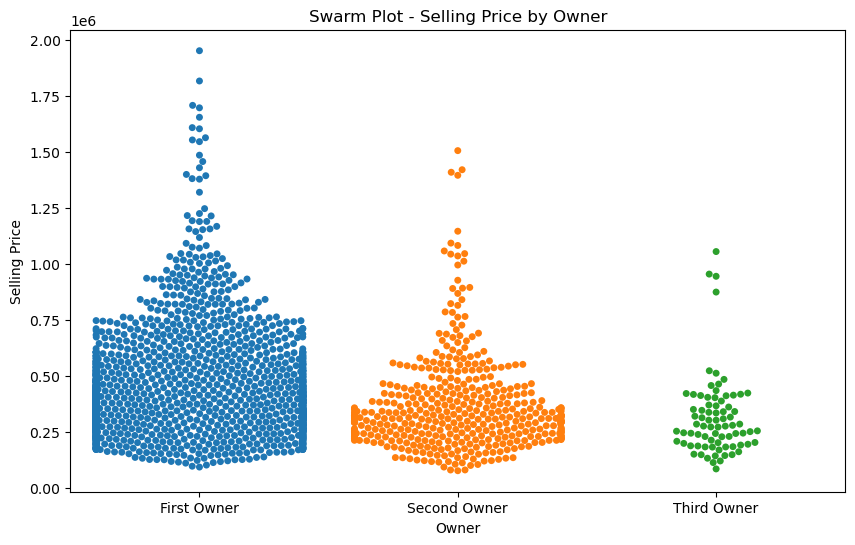

In [35]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Owner', y='Selling Price', data=df)
plt.title('Swarm Plot - Selling Price by Owner')
plt.xlabel('Owner')
plt.ylabel('Selling Price')

Text(0.5, 1.0, 'Distribution of Fuel Types')

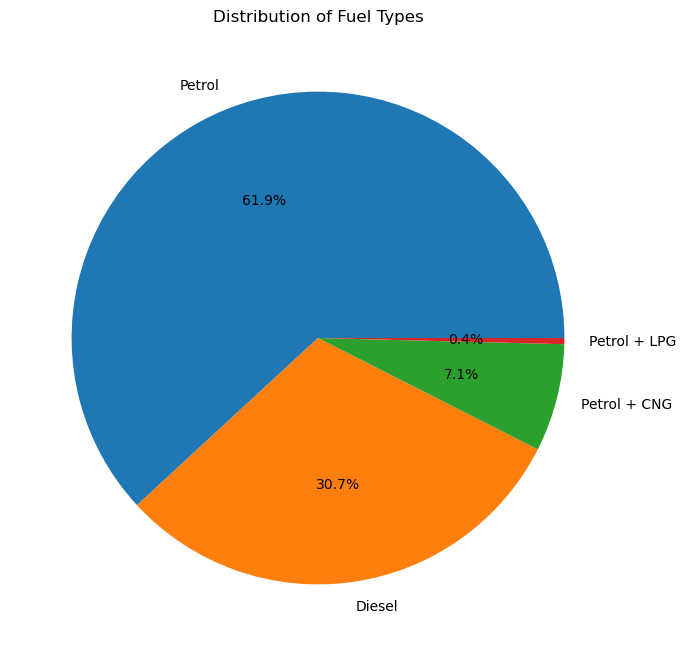

In [36]:
plt.figure(figsize=(8, 8))
fuel_type_distribution = df['Fuel Type'].value_counts()
plt.pie(fuel_type_distribution, labels=fuel_type_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Fuel Types')

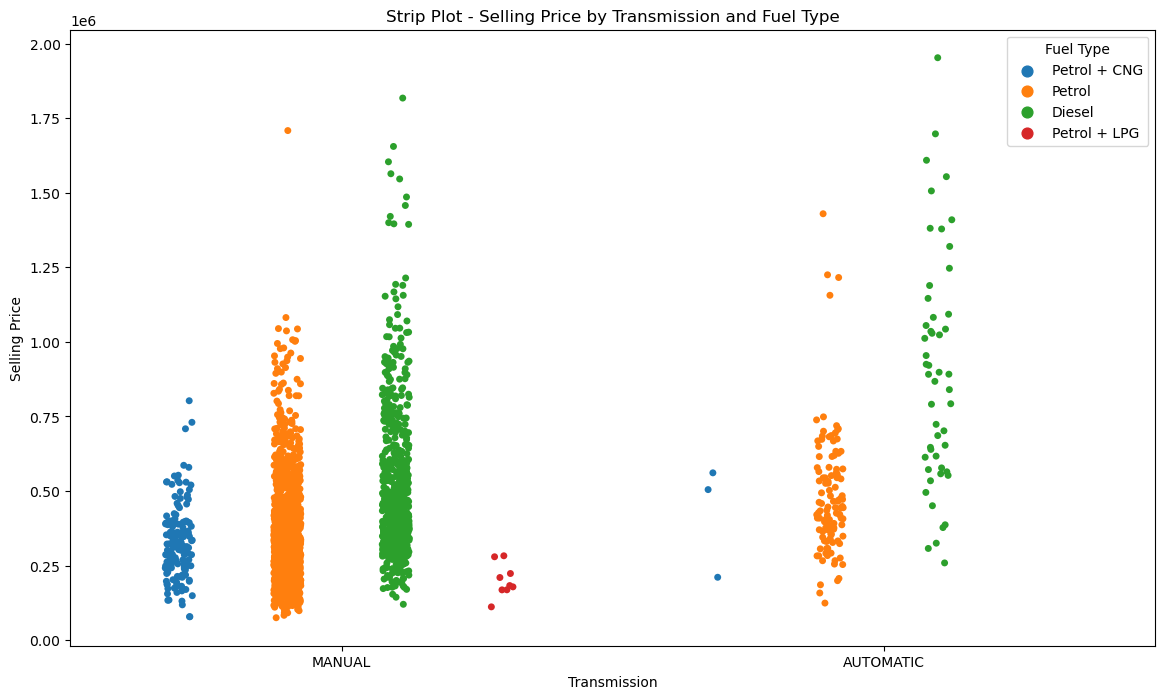

In [37]:
plt.figure(figsize=(14, 8))
sns.stripplot(x='Transmission', y='Selling Price', hue='Fuel Type', data=df, jitter=True, dodge=True)
plt.title('Strip Plot - Selling Price by Transmission and Fuel Type')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.legend(title='Fuel Type')

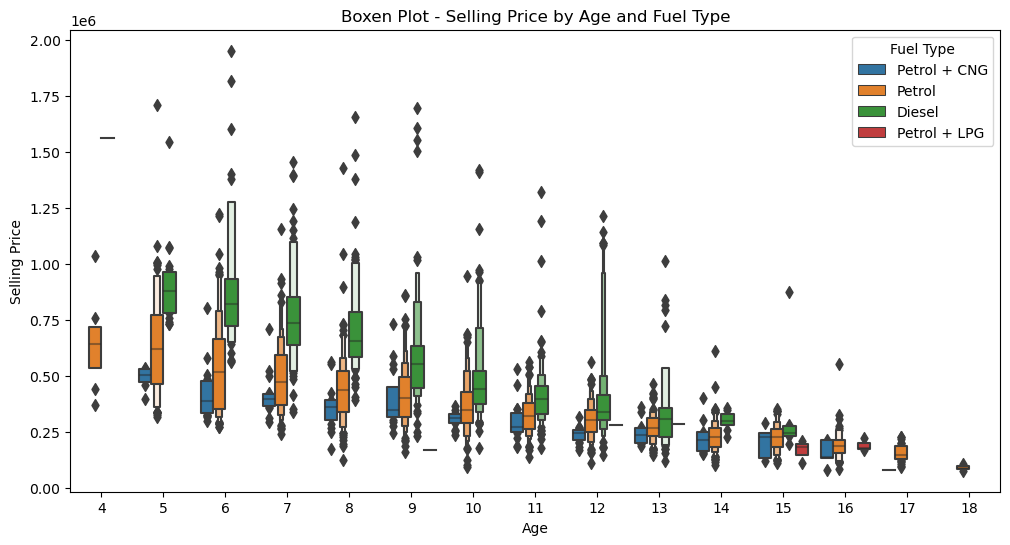

In [38]:
plt.figure(figsize=(12, 6))
sns.boxenplot(x='Age', y='Selling Price', hue='Fuel Type', data=df)
plt.title('Boxen Plot - Selling Price by Age and Fuel Type')
plt.xlabel('Age')
plt.ylabel('Selling Price')
plt.legend(title='Fuel Type')

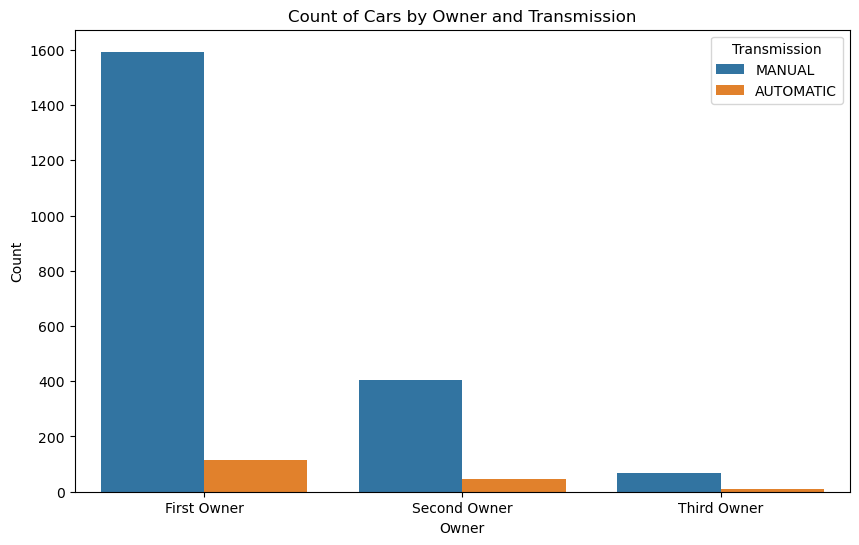

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Owner', hue='Transmission', data=df)
plt.title('Count of Cars by Owner and Transmission')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.legend(title='Transmission')

Text(0, 0.5, 'Kilometers Driven')

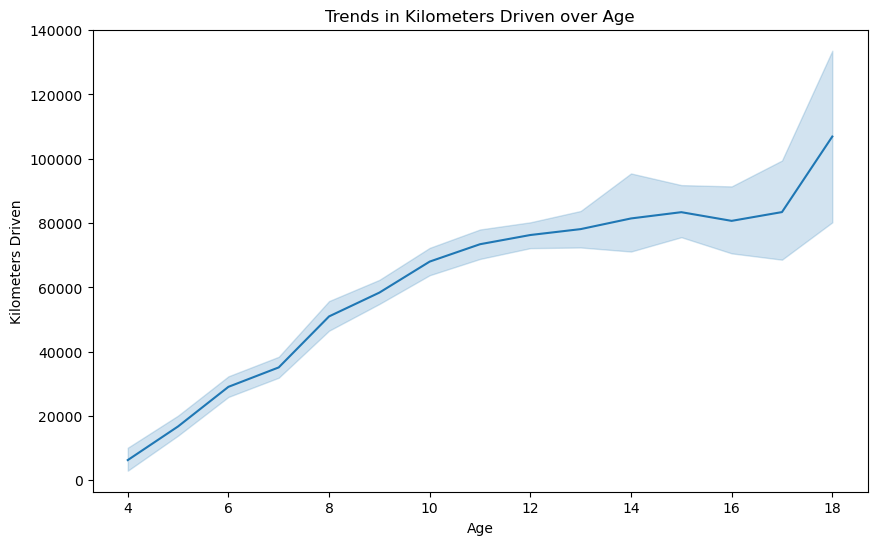

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Kilometers Driven', data=df)
plt.title('Trends in Kilometers Driven over Age')
plt.xlabel('Age')
plt.ylabel('Kilometers Driven')

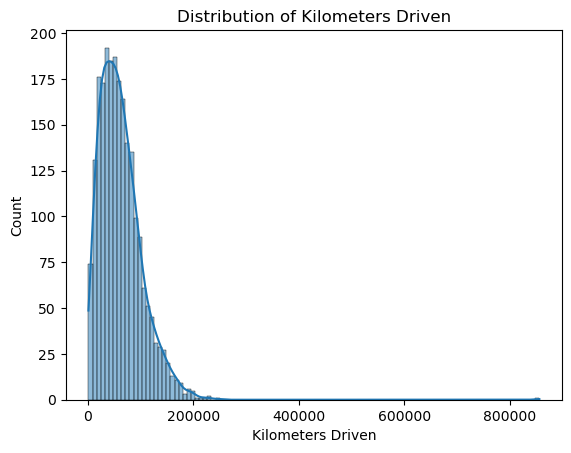

In [41]:
sns.histplot(df['Kilometers Driven'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.show()

Data preprocessing

In [42]:
# Convert the Categorical Data into Numeric
from sklearn.preprocessing import LabelEncoder
columns=['Model','Insurance','Owner', 'Fuel Type', 'Transmission']
label=LabelEncoder()
for column in columns:
    df[column] = label.fit_transform(df[column])

In [43]:
# Transformation of Skewed Data
columns = ['Selling Price', 'Kilometers Driven','Current Price']
df[columns] = np.log1p(df[columns])

In [44]:
df.head()

,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price,Age
0,311,12.651290,11.317385,0,2,1,0,4.2,13.049795,10
1,311,12.398757,11.390927,1,2,1,1,4.4,13.049795,9
2,311,12.852390,10.300114,1,2,1,1,4.3,13.049795,7
3,311,12.111762,11.942823,0,2,1,1,4.1,13.049795,11
4,311,12.386309,11.392925,1,2,1,1,4.4,13.049795,12


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2237 non-null   int32  
 1   Selling Price      2237 non-null   float64
 2   Kilometers Driven  2237 non-null   float64
 3   Owner              2237 non-null   int32  
 4   Fuel Type          2237 non-null   int32  
 5   Transmission       2237 non-null   int32  
 6   Insurance          2237 non-null   int32  
 7   Car Condition      2237 non-null   float64
 8   Current Price      2237 non-null   float64
 9   Age                2237 non-null   int64  
dtypes: float64(4), int32(5), int64(1)
memory usage: 213.1 KB


In [46]:
df.describe()

,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price,Age
count,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,220.755923,12.822666,10.787989,0.271793,0.772016,0.924005,0.881985,4.370854,14.883110,10.236477
std,106.628945,0.485263,0.781677,0.517472,0.584431,0.265049,0.322698,0.288990,3.849744,2.874686
min,0.000000,11.229235,6.817831,0.000000,0.000000,0.000000,0.000000,3.000000,12.154785,4.000000
25%,137.000000,12.513925,10.377794,0.000000,0.000000,1.000000,1.000000,4.200000,13.155800,8.000000
50%,219.000000,12.782124,10.922894,0.000000,1.000000,1.000000,1.000000,4.300000,13.395441,10.000000
75%,294.000000,13.128942,11.331739,0.000000,1.000000,1.000000,1.000000,4.600000,13.919871,12.000000
max,433.000000,14.484569,13.659888,2.000000,3.000000,1.000000,1.000000,5.000000,27.484769,18.000000


In [47]:
# Corelation
df.corr()

,Model,Selling Price,Kilometers Driven,Owner,Fuel Type,Transmission,Insurance,Car Condition,Current Price,Age
Model,1.000000,0.005439,0.028819,-0.055242,-0.100526,0.069572,0.001359,0.040920,-0.139390,-0.031723
Selling Price,0.005439,1.000000,-0.255909,-0.198167,-0.352442,-0.216120,0.047642,0.484317,0.117018,-0.663100
Kilometers Driven,0.028819,-0.255909,1.000000,0.130502,-0.200937,0.058164,-0.032682,-0.559992,-0.012423,0.526236
Owner,-0.055242,-0.198167,0.130502,1.000000,0.076327,-0.064547,-0.067616,-0.222139,-0.021191,0.249600
Fuel Type,-0.100526,-0.352442,-0.200937,0.076327,1.000000,0.026685,-0.019416,-0.038831,-0.028454,0.046745
Transmission,0.069572,-0.216120,0.058164,-0.064547,0.026685,1.000000,0.004902,-0.103666,-0.043454,0.105185
Insurance,0.001359,0.047642,-0.032682,-0.067616,-0.019416,0.004902,1.000000,0.103133,0.017575,-0.043182
Car Condition,0.040920,0.484317,-0.559992,-0.222139,-0.038831,-0.103666,0.103133,1.000000,0.040467,-0.649011
Current Price,-0.139390,0.117018,-0.012423,-0.021191,-0.028454,-0.043454,0.017575,0.040467,1.000000,-0.010068
Age,-0.031723,-0.663100,0.526236,0.249600,0.046745,0.105185,-0.043182,-0.649011,-0.010068,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

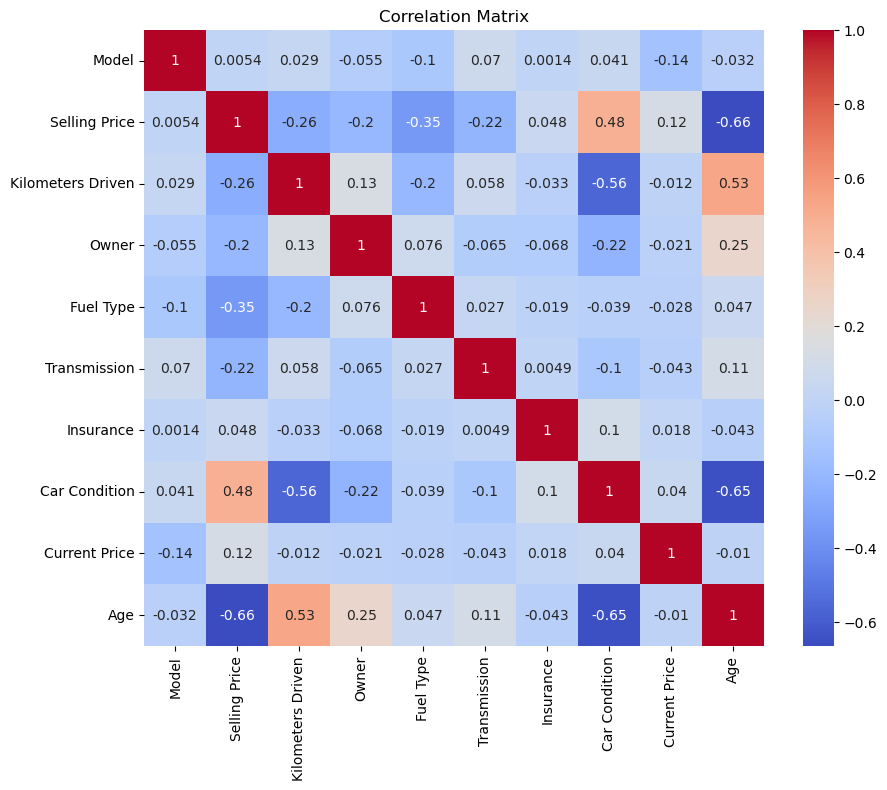

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [49]:
# Selection of x and y Variables
X=df.drop('Selling Price', axis=1)
y=df['Selling Price']

In [50]:
# Standardization of independent Variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(X)
x

array([[ 0.84652675,  0.67740785, -0.52534885, ..., -0.59134292,
        -0.476324  , -0.08228039],
       [ 0.84652675,  0.7715117 ,  1.40755472, ...,  0.10087796,
        -0.476324  , -0.43022222],
       [ 0.84652675, -0.6242787 ,  1.40755472, ..., -0.24523248,
        -0.476324  , -1.12610588],
       ...,
       [-1.82689107, -3.06896288, -0.52534885, ...,  2.1775406 ,
        -0.31535928, -1.82198955],
       [-1.10459924,  0.38947798, -0.52534885, ...,  0.4469884 ,
         2.62930037, -1.47404772],
       [-1.05769717, -0.70047419, -0.52534885, ..., -4.05244732,
        -0.56385629,  0.96154511]])

Model Selection and Training

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [52]:
y_test.shape

(448,)

In [53]:
x_train.shape

(1789, 9)

In [54]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [55]:
y_pred=lm.predict(x_test)

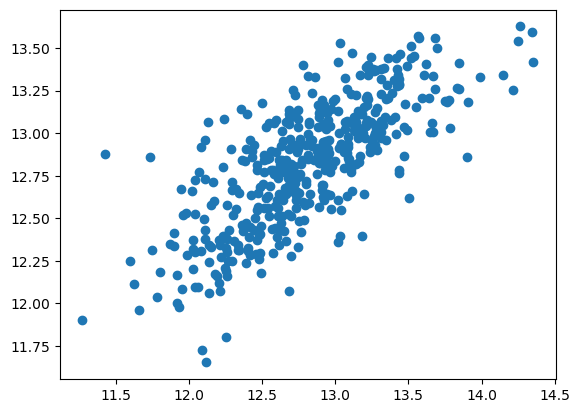

In [56]:
plt.scatter(y_test,y_pred)

Model Evaluation

In [57]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2507783099324564
MSE: 0.10993009997851343
RMSE: 0.33155708404212


In [58]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.5574300084058111

Cross Validation and mean_absolute_error

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

models = {'Decision Tree': DecisionTreeRegressor(),
          'AdaBoost': AdaBoostRegressor(),
          'XGBoost': XGBRegressor(),
          'Random Forest': RandomForestRegressor(),
          'Gradient Boosting': GradientBoostingRegressor()}

for model_name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
    print(f'{model_name}: R2 Score: {np.mean(scores):.4f} (std: {np.std(scores):.4f})')


Decision Tree: R2 Score: 0.6991 (std: 0.0459)
AdaBoost: R2 Score: 0.7116 (std: 0.0070)
XGBoost: R2 Score: 0.8267 (std: 0.0104)
Random Forest: R2 Score: 0.8249 (std: 0.0133)
Gradient Boosting: R2 Score: 0.8450 (std: 0.0053)


In [60]:
from sklearn.metrics import mean_absolute_error

models = {'Decision Tree': DecisionTreeRegressor(),
          'AdaBoost': AdaBoostRegressor(),
          'XGBoost': XGBRegressor(),
          'Random Forest': RandomForestRegressor(),
          'Gradient Boosting': GradientBoostingRegressor()}

for model_name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_scores = -scores  # Convert negative scores back to positive
    print(f'{model_name}: Mean Absolute Error: {np.mean(mae_scores):.4f} (std: {np.std(mae_scores):.4f})')


Decision Tree: Mean Absolute Error: 0.1926 (std: 0.0093)
AdaBoost: Mean Absolute Error: 0.1946 (std: 0.0105)
XGBoost: Mean Absolute Error: 0.1466 (std: 0.0075)
Random Forest: Mean Absolute Error: 0.1477 (std: 0.0073)
Gradient Boosting: Mean Absolute Error: 0.1414 (std: 0.0057)
